In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
name_label = LabelEncoder()
df['Car_Name'] = name_label.fit_transform(df['Car_Name'])

In [9]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,93,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,68,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,96,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,92,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
fuel_label = LabelEncoder()
df['Fuel_Type'] = fuel_label.fit_transform(df['Fuel_Type'])

In [11]:
transmission_label = LabelEncoder()
df['Transmission'] = transmission_label.fit_transform(df['Transmission'])

In [12]:
owner_label = LabelEncoder()
df['Owner'] = owner_label.fit_transform(df['Owner'])

In [13]:
seller_type_label = LabelEncoder()
df['Seller_Type'] = seller_type_label.fit_transform(df['Seller_Type'])

In [14]:
print(df['Car_Name'].unique())
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

[90 93 68 96 92 95 91 62 76 73 63 85  0 65 89 81 86 71 77 78 80 70 79 67
 88 49 56 42 11 46 43 40 48 41 44 17 45 47  6  4 32 60 58 51 14 37 20  7
  5 57 12 15 52 26 16 61 31 54 38  8 28  1 25 34 59 13  2 35 22 39 30 53
 23 27 33  9 50 55 36 21 29 10 24 19 18  3 84 82 83 75 97 74 72 94 69 66
 64 87]
[2 1 0]
[0 1]
[1 0]
[0 1 2]


In [15]:
x = df.drop(['Selling_Price'],axis=1)
y = df['Selling_Price']

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
ss = StandardScaler()
x = pd.DataFrame(ss.fit_transform(x),columns=x.columns)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression , Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

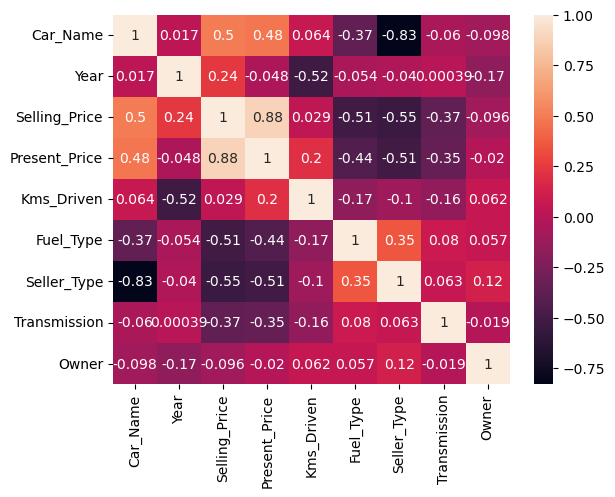

In [21]:
sns.heatmap(data=df.corr(),annot=True)
plt.show()

In [22]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)*100,lr.score(x_test,y_test)*100

(88.29797505334983, 84.8207004774536)

In [23]:
lr1 = Lasso(alpha=0.05)
lr1.fit(x_train,y_train)
lr1.score(x_train,y_train)*100,lr1.score(x_test,y_test)*100

(88.24248015247284, 84.59339107408664)

In [24]:
lr2 = Ridge(alpha=0.05)
lr2.fit(x_train,y_train)
lr2.score(x_train,y_train)*100,lr2.score(x_test,y_test)*100

(88.29797157501264, 84.81847967607389)

In [25]:
lr3 = ElasticNet(alpha=0.5)
lr3.fit(x_train,y_train)
lr3.score(x_train,y_train)*100,lr3.score(x_test,y_test)*100

(83.92386680466714, 78.40079506389543)

In [26]:
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(99.96109758796794, 95.96180336281812)

In [27]:
rf = RandomForestRegressor(n_estimators=9)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)*100,rf.score(x_test,y_test)*100

(97.31557624486908, 95.22732712275265)

In [28]:
svr = SVR()
svr.fit(x_train,y_train)
svr.score(x_train,y_train)*100,svr.score(x_test,y_test)*100

(65.8986739470673, 78.39673448871937)

In [29]:
knn = KNeighborsRegressor(n_neighbors = 11)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)*100,knn.score(x_test,y_test)*100

(85.74967457145722, 89.96959843072318)

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [31]:
mean_squared_error(y_test,dt.predict(x_test)),mean_absolute_error(y_test,dt.predict(x_test))

(0.9302221994535521, 0.6316939890710382)

In [32]:
mean_squared_error(y_test,rf.predict(x_test)),mean_absolute_error(y_test,rf.predict(x_test))

(1.0994130945152802, 0.6157559198542805)

In [33]:
x_test

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
177,-1.275759,0.821718,-0.817924,-0.333500,0.500183,1.356327,-2.554408,-0.188098
289,0.251795,0.821718,0.691970,-0.668875,0.500183,-0.737285,0.391480,-0.188098
228,1.230996,-0.563924,0.205282,0.593804,-1.852241,-0.737285,0.391480,-0.188098
198,-2.059120,-0.910335,-0.817924,-0.050157,0.500183,1.356327,0.391480,4.530025
60,0.330131,-0.217514,1.272521,0.078661,0.500183,-0.737285,0.391480,-0.188098
...,...,...,...,...,...,...,...,...
234,0.760979,0.475308,-0.223468,-0.835995,0.500183,-0.737285,0.391480,-0.188098
296,0.251795,0.821718,0.460214,-0.076225,-1.852241,-0.737285,0.391480,-0.188098
281,0.251795,-2.642389,-0.003299,0.347965,0.500183,-0.737285,0.391480,-0.188098
285,0.956819,0.821718,0.100991,-0.563806,0.500183,-0.737285,-2.554408,-0.188098


In [34]:
rf.predict([[0.251795,0.821718,0.691970,-0.668875,0.500183,-0.737285,0.391480,-0.188098]])

F:\Python_working\envs\myenv1\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([10.47666667])

In [35]:
y_test

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
       ...  
234     5.50
296     9.50
281     2.10
285     7.40
182     0.30
Name: Selling_Price, Length: 61, dtype: float64

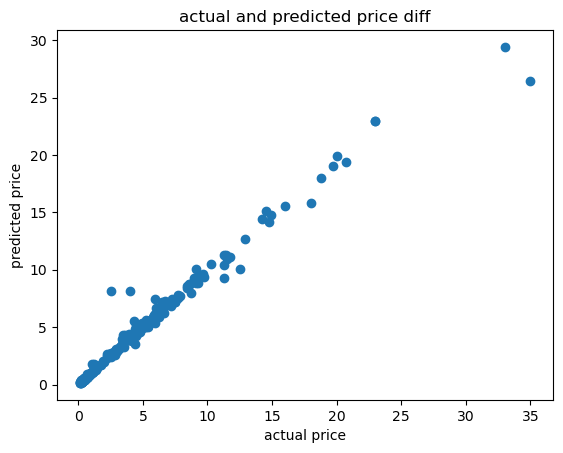

In [36]:
plt.scatter(y_train,rf.predict(x_train))
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual and predicted price diff")
plt.show()

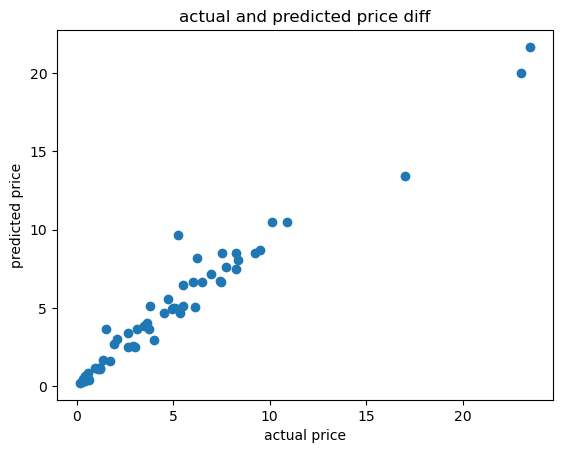

In [37]:
plt.scatter(y_test,rf.predict(x_test))
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual and predicted price diff")
plt.show()